In [146]:
from sklearn.datasets import load_digits
digits=load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

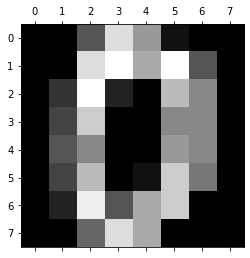

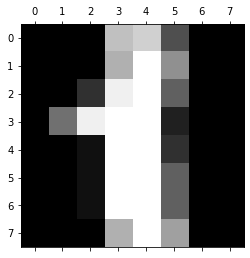

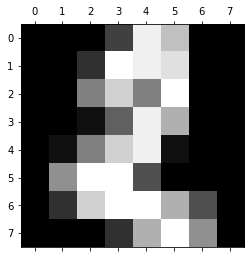

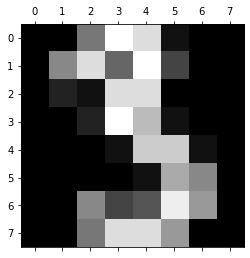

In [147]:
import matplotlib.pyplot as plt
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

In [148]:
#Importing the algorithms that we are going to compare
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.2)

In [151]:
#Using Grid Search on svm 
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(SVC(gamma='auto'),{
    'C': [1,10,20],
    'kernel' : ['rbf','linear']
},cv=5,return_train_score=False)

clf.fit(digits.data,digits.target)
clf.cv_results_

{'mean_fit_time': array([0.40177956, 0.03593063, 0.38796954, 0.03501081, 0.25909619,
        0.02432156]),
 'std_fit_time': array([0.01200618, 0.00371302, 0.00870767, 0.00439467, 0.01793109,
        0.00014553]),
 'mean_score_time': array([0.1206593 , 0.01139746, 0.11697087, 0.01250963, 0.07755914,
        0.00650153]),
 'std_score_time': array([0.00369402, 0.00403211, 0.01090143, 0.00341946, 0.00466398,
        0.0032582 ]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'}],


In [152]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.401780,0.012006,0.120659,0.003694,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.411111,0.450000,0.454039,0.448468,0.479109,0.448545,0.021761,6
1,0.035931,0.003713,0.011397,0.004032,1,linear,"{'C': 1, 'kernel': 'linear'}",0.963889,0.919444,0.966574,0.963788,0.924791,0.947697,0.020978,1
2,0.387970,0.008708,0.116971,0.010901,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.452778,0.469444,0.479109,0.479109,0.501393,0.476366,0.015784,4
3,0.035011,0.004395,0.012510,0.003419,10,linear,"{'C': 10, 'kernel': 'linear'}",0.963889,0.919444,0.966574,0.963788,0.924791,0.947697,0.020978,1
4,0.259096,0.017931,0.077559,0.004664,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.452778,0.469444,0.479109,0.479109,0.501393,0.476366,0.015784,4
5,0.024322,0.000146,0.006502,0.003258,20,linear,"{'C': 20, 'kernel': 'linear'}",0.963889,0.919444,0.966574,0.963788,0.924791,0.947697,0.020978,1


In [153]:
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.448545
1,1,linear,0.947697
2,10,rbf,0.476366
3,10,linear,0.947697
4,20,rbf,0.476366
5,20,linear,0.947697


In [160]:
#Hyperparameter Tuning - Choosing the best model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
model_params = {
    'svm': {
        'model':SVC(gamma='auto'),
        'params':{
            'C': [1,10,20],
            'kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators' : [1,5,10]
        }
    },
    'logistic_regression': {
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C':[1,5,10]
        }
    },
    'decision_tree':{
        'model':DecisionTreeClassifier(),
        'params':{
                'criterion':['gini','entropy']
        }
    },
    'gaussian_nb':{
        'model': GaussianNB(),
        'params':{
            'priors':[None]
        }
    },
    'multinomial_nb':{
        'model': MultinomialNB(),
        'params':{
            'alpha':[0.5,1]
        }
    }
}

In [161]:
scores = []

for model_name,mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(iris.data,iris.target)
    scores.append({
        'model': model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

In [162]:
df = pd.DataFrame(scores,columns = ['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.966667,{'n_estimators': 10}
2,logistic_regression,0.966667,{'C': 5}
3,decision_tree,0.966667,{'criterion': 'gini'}
4,gaussian_nb,0.953333,{'priors': None}
5,multinomial_nb,0.953333,{'alpha': 0.5}
